In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import utils

### Download the TRAINING SET (data+labels)

In [2]:
train_data=torch.load('../../data/fashion-mnist/train_data.pt')
train_label=torch.load('../../data/fashion-mnist/train_label.pt')
print(train_data.size())
print(train_label.size())

torch.Size([60000, 28, 28])
torch.Size([60000])


### Download the TEST SET (data only)

In [3]:
test_data=torch.load('../../data/fashion-mnist/test_data.pt')
print(test_data.size())

torch.Size([10000, 28, 28])


### Make a one layer net class

In [4]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super(one_layer_net , self).__init__()
        
        self.linear_layer = nn.Linear(input_size, output_size, bias=False)
        
    def forward(self, x):
        
        x = self.linear_layer(x)
        p = F.softmax(x,dim=1)
        
        return p

### Build the net

In [5]:
net=one_layer_net(784,10)
print(net)

one_layer_net(
  (linear_layer): Linear(in_features=784, out_features=10, bias=False)
)


### Take the 4th image of the test set:

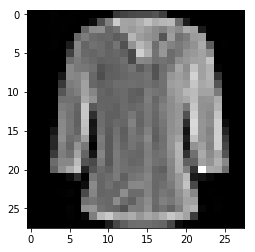

In [6]:
im= test_data[4]
utils.show(im)

### And feed it to the UNTRAINED network:

In [7]:
p = net( im.view(1,784) )
print(p)

tensor([[0.0674, 0.1244, 0.1214, 0.1113, 0.1610, 0.0934, 0.0894, 0.0778, 0.0874,
         0.0666]], grad_fn=<SoftmaxBackward>)


### Display visually the confidence scores

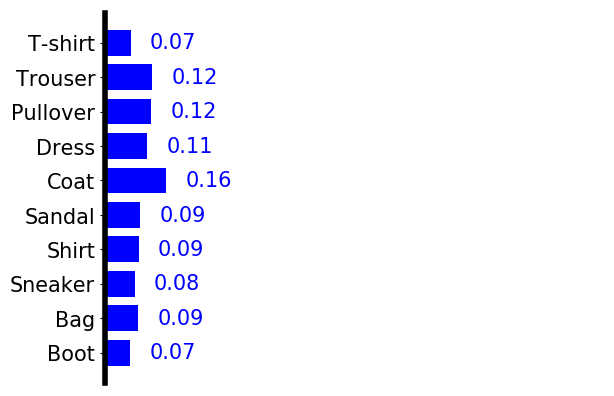

In [8]:
utils.show_prob_fashion_mnist(p)

### Train the network (only 5000 iterations) on the train set

In [10]:
criterion = nn.NLLLoss()
optimizer=torch.optim.SGD(net.parameters() , lr=0.01 )

for iter in range(1,5000):
    
    # choose a random integer between 0 and 59,999 
    # extract the corresponding image and label
    idx = randint(0, 60000 -1)
    im = train_data[idx]
    label = train_label[idx]
    
    # reshape the image to fit the network
    input = im.view(1,784)

    # feed the input to the net  
    prob = net(input)
 
    # update the weights (all the magic happens here -- we will discuss it later)
    log_prob=torch.log(prob)
    loss = criterion(log_prob, label.view(1))    
    optimizer.zero_grad()       
    loss.backward()
    optimizer.step()

### Take the 34th image of the test set:

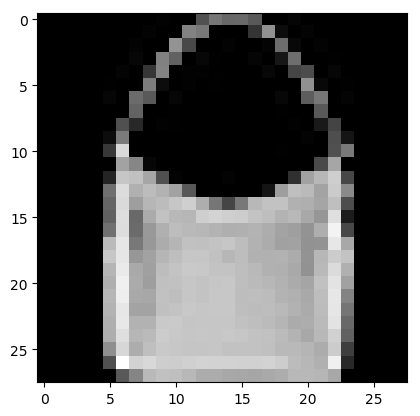

In [11]:
im= test_data[34]
utils.show(im)

### Feed it to the TRAINED net:

In [12]:
p = net (im.view(1,784))
print(p)

tensor([[9.8577e-05, 5.0943e-06, 4.5291e-03, 2.1821e-03, 1.3592e-02, 4.5631e-02,
         6.9998e-03, 1.7047e-04, 9.2676e-01, 2.9914e-05]],
       grad_fn=<SoftmaxBackward>)


### Display visually the confidence scores

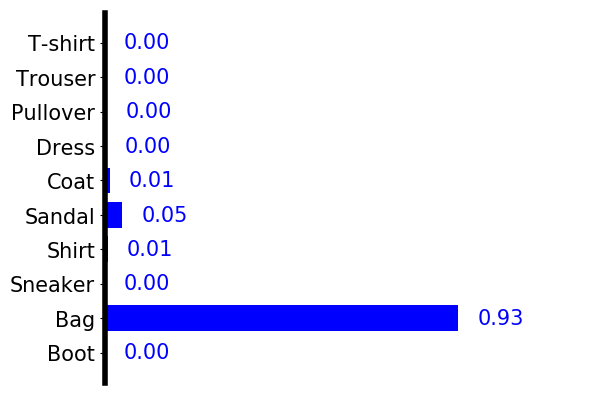

In [13]:
utils.show_prob_fashion_mnist(p)

### Choose image at random from the test set and see how good/bad are the predictions

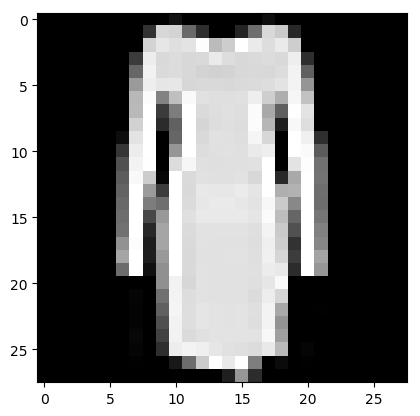

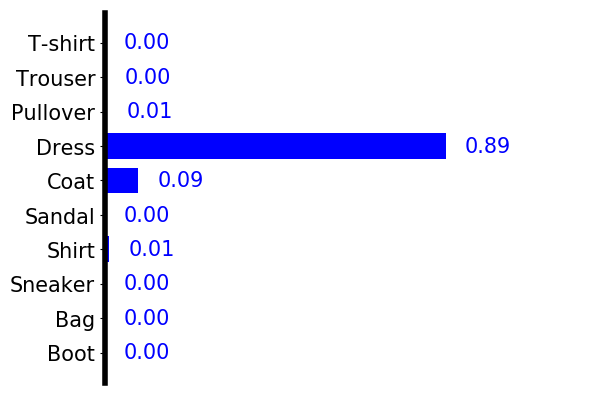

In [15]:
# choose a picture at random
idx=randint(0, 10000-1)
im=test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
prob =  net( im.view(1,784)) 
utils.show_prob_fashion_mnist(prob)